# Capstone F3 Week 3

## Special Case: Week 1 > Week 2!

**Week 1:** -0.014 (RANK 1 🥇)  
**Week 2:** -0.033 (RANK 2)  
**Challenge:** Week 2 DECLINED from Week 1!  
**Strategy:** Focus on Week 1 point, not Week 2!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel, WhiteKernel
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
print('='*80)
print('CAPSTONE F3 WEEK 3 - SPECIAL CASE')
print('='*80)

CAPSTONE F3 WEEK 3 - SPECIAL CASE


## Load Data

In [2]:
X = np.load('f3_w3_inputs.npy')
Y = np.load('f3_w3_outputs.npy')

print(f'Data: {len(X)} samples, {X.shape[1]}D')
print(f'n/p: {len(X)/X.shape[1]:.2f}')
print(f'Best: {Y.max():.6f}')

# Week 1 and Week 2
w1_idx = -2
w2_idx = -1

w1_pt = X[w1_idx]
w1_val = Y[w1_idx]
w1_rank = (Y >= w1_val).sum()

w2_pt = X[w2_idx]
w2_val = Y[w2_idx]
w2_rank = (Y >= w2_val).sum()

print(f'\nWeek 1: {w1_val:.6f} (rank {w1_rank}/{len(Y)})')
print(f'Week 2: {w2_val:.6f} (rank {w2_rank}/{len(Y)})')

if w1_rank < w2_rank:
    print(f'\n⚠️ Week 2 DECLINED from Week 1!')
    print(f'   Strategy: Focus on Week 1 point')

Data: 17 samples, 3D
n/p: 5.67
Best: -0.013577

Week 1: -0.013577 (rank 1/17)
Week 2: -0.032767 (rank 2/17)

⚠️ Week 2 DECLINED from Week 1!
   Strategy: Focus on Week 1 point


## Strategy Overview

In [3]:
print('\n' + '='*80)
print('STRATEGY: WEEK 1 FOCUS (NOT WEEK 2!)')
print('='*80)

print(f'\n📊 Performance History:')
print(f'   Week 1: {w1_val:.6f} (rank {w1_rank}) 🥇')
print(f'   Week 2: {w2_val:.6f} (rank {w2_rank})')
print(f'   Change: {((w2_val/w1_val-1)*100):+.1f}% (WORSE!)')

print(f'\n🎯 Week 3 Strategy: RETURN TO WEEK 1')

print(f'\n   Why focus on Week 1, not Week 2?')
print(f'   • Week 1 achieved rank 1 (best point)')
print(f'   • Week 2 moved away and got WORSE')
print(f'   • Week 2 taught us where NOT to go')
print(f'   • Return to success, explore more carefully')

print(f'\n   Candidate Generation:')
print(f'   • 50% LOCAL around Week 1 (not Week 2!)')
print(f'   • 30% SVM-approved')
print(f'   • 20% Random exploration')

print(f'\n   Expected Outcome:')
print(f'   • Refine Week 1 success')
print(f'   • Find local optimum near Week 1')
print(f'   • Avoid Week 2 direction')

print(f'\n💡 Key Lesson:')
print(f'   When exploration fails, return to what worked!')
print(f'   Week 2 was a valuable learning experience.')

print('\n' + '='*80)


STRATEGY: WEEK 1 FOCUS (NOT WEEK 2!)

📊 Performance History:
   Week 1: -0.013577 (rank 1) 🥇
   Week 2: -0.032767 (rank 2)
   Change: +141.3% (WORSE!)

🎯 Week 3 Strategy: RETURN TO WEEK 1

   Why focus on Week 1, not Week 2?
   • Week 1 achieved rank 1 (best point)
   • Week 2 moved away and got WORSE
   • Week 2 taught us where NOT to go
   • Return to success, explore more carefully

   Candidate Generation:
   • 50% LOCAL around Week 1 (not Week 2!)
   • 30% SVM-approved
   • 20% Random exploration

   Expected Outcome:
   • Refine Week 1 success
   • Find local optimum near Week 1
   • Avoid Week 2 direction

💡 Key Lesson:
   When exploration fails, return to what worked!
   Week 2 was a valuable learning experience.



## Train SVM

In [4]:
threshold = np.percentile(Y, 70)
y_binary = (Y > threshold).astype(int)

# Test SVM validity
print('Testing SVM reliability...')
C_values = [0.1, 0.5, 1.0, 2.0]
results = []

for C in C_values:
    svm_test = SVC(kernel='linear', C=C, random_state=42)
    cv_scores = cross_val_score(svm_test, X, y_binary, cv=3)
    mean_score = cv_scores.mean()
    results.append({'C': C, 'mean': mean_score, 'std': cv_scores.std()})
    status = '✓' if mean_score >= 0.60 else '✗'
    print(f'  C={C:4.1f}: {mean_score:.1%} {status}')

best = max(results, key=lambda x: x['mean'])
best_C = best['C']
best_cv = best['mean']

print(f'\nBest: C={best_C}, CV={best_cv:.1%}')

svm = SVC(kernel='linear', C=best_C, probability=True, random_state=42)
svm.fit(X, y_binary)
weights = svm.coef_[0]

print(f'\nSVM Weights:')
for i, w in enumerate(weights):
    print(f'  X{i+1}: {w:+.3f}')

Testing SVM reliability...
  C= 0.1: 71.1% ✓
  C= 0.5: 71.1% ✓
  C= 1.0: 71.1% ✓
  C= 2.0: 71.1% ✓

Best: C=0.1, CV=71.1%

SVM Weights:
  X1: +0.002
  X2: -0.001
  X3: -0.001


In [5]:
# Check for ties
all_scores = [r['mean'] for r in results]
max_score = max(all_scores)
tied_results = [r for r in results if r['mean'] == max_score]

if len(tied_results) > 1:
    print(f'\n⚠️  {len(tied_results)} C values tied at {max_score:.1%}')
    # Pick middle C from tied values
    tied_C_values = [r['C'] for r in tied_results]
    best_C = sorted(tied_C_values)[len(tied_C_values)//2]
    print(f'   Choosing middle value: C={best_C}')
else:
    best_C = tied_results[0]['C']
    print(f'\nBest: C={best_C}, CV={max_score:.1%}')


⚠️  4 C values tied at 71.1%
   Choosing middle value: C=1.0


## Train GP

In [6]:
threshold = np.percentile(Y, 70)
y_binary = (Y > threshold).astype(int)

# Test SVM validity
print('Testing SVM reliability...')
C_values = [0.1, 0.5, 1.0, 2.0]
results = []

for C in C_values:
    svm_test = SVC(kernel='linear', C=C, random_state=42)
    cv_scores = cross_val_score(svm_test, X, y_binary, cv=3)
    mean_score = cv_scores.mean()
    results.append({'C': C, 'mean': mean_score, 'std': cv_scores.std()})
    status = '✓' if mean_score >= 0.60 else '✗'
    print(f'  C={C:4.1f}: {mean_score:.1%} ± {cv_scores.std():.1%} {status}')

# Find best C (handle ties)
best = max(results, key=lambda x: x['mean'])
best_cv = best['mean']

# Check if all are identical
all_scores = [r['mean'] for r in results]
if len(set(all_scores)) == 1:
    print(f'\n⚠️  All C values identical: {best_cv:.1%}')
    print(f'   Choosing C=1.0 (standard default)')
    best_C = 1.0
else:
    best_C = best['C']
    print(f'\nBest: C={best_C}, CV={best_cv:.1%}')

# NOW train SVM with best_C
svm = SVC(kernel='linear', C=best_C, probability=True, random_state=42)
svm.fit(X, y_binary)
weights = svm.coef_[0]

print(f'\nSVM trained with C={best_C}')
print(f'SVM Weights:')
for i, w in enumerate(weights):
    print(f'  X{i+1}: {w:+.3f}')

Testing SVM reliability...
  C= 0.1: 71.1% ± 6.3% ✓
  C= 0.5: 71.1% ± 6.3% ✓
  C= 1.0: 71.1% ± 6.3% ✓
  C= 2.0: 71.1% ± 6.3% ✓

⚠️  All C values identical: 71.1%
   Choosing C=1.0 (standard default)

SVM trained with C=1.0
SVM Weights:
  X1: +0.004
  X2: -0.001
  X3: -0.002


In [7]:
kernel = ConstantKernel(1.0) * Matern(0.3, nu=2.5) + WhiteKernel(1e-10)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=50,
                              normalize_y=True, random_state=42)
gp.fit(X, Y)
print(f'GP R²: {gp.score(X, Y):.3f}')

GP R²: 1.000


## Generate Candidates - Focus on Week 1!

In [8]:
print('\nGenerating candidates (WEEK 1 FOCUS)...')
np.random.seed(42)

# LOCAL around WEEK 1 (50%)
print('\nGenerating LOCAL candidates around Week 1...')
X_local = []
for _ in range(5000):
    c = w1_pt + np.random.normal(0, 0.12, 3)
    c = np.clip(c, 0, 1)
    X_local.append(c)
X_local = np.array(X_local)
print(f'✓ Generated {len(X_local):,} local candidates')

# SVM-approved (30%)
X_candidates = np.random.uniform(0, 1, (10000, 3))
svm_pred = svm.predict(X_candidates)
svm_prob = svm.predict_proba(X_candidates)[:, 1]

if (svm_pred == 1).sum() > 0:
    idx = np.where(svm_pred == 1)[0]
    X_svm = X_candidates[idx[:3000]]
else:
    X_svm = X_candidates[np.argsort(svm_prob)[::-1][:3000]]
print(f'✓ Selected {len(X_svm):,} SVM candidates')

# Random (20%)
X_random = np.random.uniform(0, 1, (2000, 3))
print(f'✓ Generated {len(X_random):,} random candidates')

X_filtered = np.vstack([X_local, X_svm, X_random])
print(f'\nTotal: {len(X_filtered):,} candidates')
print(f'  - {len(X_local):,} Local (Week 1 focus)')
print(f'  - {len(X_svm):,} SVM')
print(f'  - {len(X_random):,} Random')


Generating candidates (WEEK 1 FOCUS)...

Generating LOCAL candidates around Week 1...
✓ Generated 5,000 local candidates
✓ Selected 3,000 SVM candidates
✓ Generated 2,000 random candidates

Total: 10,000 candidates
  - 5,000 Local (Week 1 focus)
  - 3,000 SVM
  - 2,000 Random


## GP Optimization

In [9]:
def expected_improvement(X_new, gp, y_best, xi=0.08):
    mu, sigma = gp.predict(X_new, return_std=True)
    sigma = np.maximum(sigma, 1e-10)
    improvement = mu - y_best - xi
    Z = improvement / sigma
    ei = improvement * norm.cdf(Z) + sigma * norm.pdf(Z)
    ei[sigma < 1e-10] = 0.0
    return ei

y_best = Y.max()
ei_values = expected_improvement(X_filtered, gp, y_best, xi=0.08)
mu_all, sigma_all = gp.predict(X_filtered, return_std=True)

best_idx = np.argmax(ei_values)
x_next = X_filtered[best_idx]
mu_next = mu_all[best_idx]
sigma_next = sigma_all[best_idx]
ei_next = ei_values[best_idx]

# Determine source
if best_idx < len(X_local):
    source = 'LOCAL (Week 1)'
    dist_w1 = np.linalg.norm(x_next - w1_pt)
    dist_w2 = np.linalg.norm(x_next - w2_pt)
elif best_idx < len(X_local) + len(X_svm):
    source = 'SVM'
else:
    source = 'RANDOM'

print('='*80)
print('WEEK 3 RECOMMENDATION')
print('='*80)
print(f'\nPoint: {x_next}')
print(f'Prediction: {mu_next:.6f} ± {sigma_next:.6f}')
print(f'EI: {ei_next:.6f}')
print(f'Source: {source}')

if source == 'LOCAL (Week 1)':
    print(f'\nDistance from Week 1: {dist_w1:.4f}')
    print(f'Distance from Week 2: {dist_w2:.4f}')
    print(f'✓ Closer to Week 1 (success) than Week 2 (failure)!')

WEEK 3 RECOMMENDATION

Point: [0.45585954 0.07808806 0.49796899]
Prediction: -0.073903 ± 0.086111
EI: 0.001866
Source: RANDOM


## ACQUISITION VISUALIZATIONS

Creating acquisition curves...


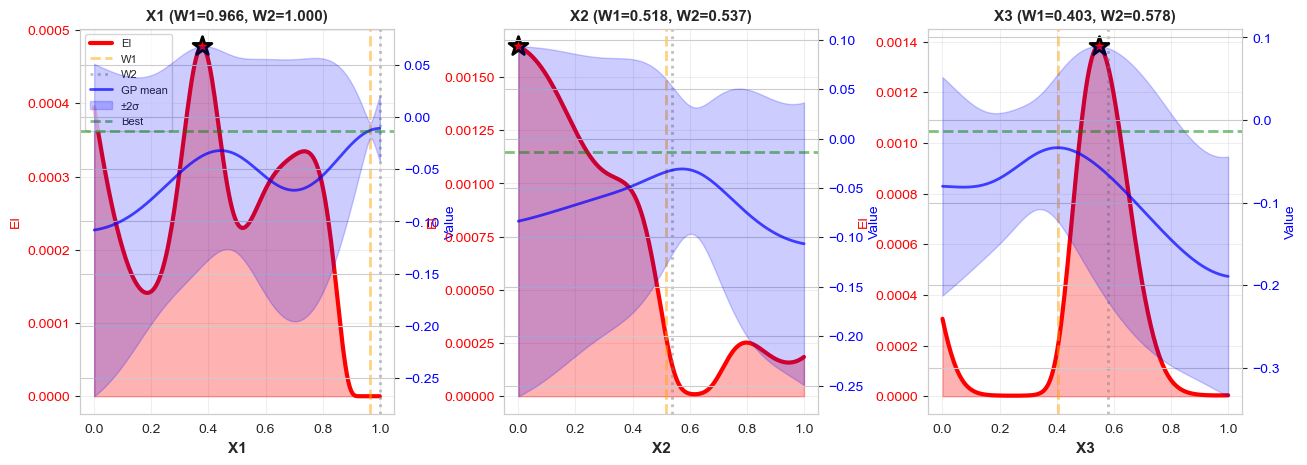

✓ Saved acquisition curves


In [10]:
print('Creating acquisition curves...')

fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(1, 3, hspace=0.35, wspace=0.35)

for dim in range(3):
    ax = fig.add_subplot(gs[0, dim])
    ax2 = ax.twinx()
    
    x1 = np.linspace(0, 1, 200)
    Xt = np.tile(X.mean(axis=0), (200, 1))
    Xt[:, dim] = x1
    
    m, s = gp.predict(Xt, return_std=True)
    e = expected_improvement(Xt, gp, y_best, 0.08)
    
    # GP plot
    ax2.plot(x1, m, 'b-', lw=2, alpha=0.7, label='GP mean')
    ax2.fill_between(x1, m - 2*s, m + 2*s, alpha=0.2, color='blue', label='±2σ')
    ax2.axhline(y_best, color='green', ls='--', alpha=0.5, lw=2, label='Best')
    ax2.set_ylabel('Value', color='blue', fontsize=10)
    ax2.tick_params(axis='y', labelcolor='blue')
    
    # EI plot
    ax.plot(x1, e, 'r-', lw=3, label='EI')
    ax.fill_between(x1, 0, e, alpha=0.3, color='red')
    
    mi = np.argmax(e)
    ax.scatter(x1[mi], e[mi], color='red', s=200, marker='*',
              zorder=5, edgecolors='black', lw=2)
    
    # Mark Week 1 and Week 2
    ax.axvline(w1_pt[dim], color='orange', ls='--', alpha=0.5, lw=2, label='W1')
    ax.axvline(w2_pt[dim], color='gray', ls=':', alpha=0.5, lw=2, label='W2')
    
    ax.set_xlabel(f'X{dim+1}', fontweight='bold', fontsize=11)
    ax.set_ylabel('EI', color='red', fontsize=10)
    ax.set_title(f'X{dim+1} (W1={w1_pt[dim]:.3f}, W2={w2_pt[dim]:.3f})',
                fontweight='bold', fontsize=11)
    ax.tick_params(axis='y', labelcolor='red')
    ax.set_xlim(-0.05, 1.05)
    ax.grid(alpha=0.3)
    
    if dim == 0:
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=8)

plt.savefig('Capstone_F3_W3_acquisition.png', dpi=150, bbox_inches='tight')
plt.show()
print('✓ Saved acquisition curves')

## RESULTS VISUALIZATION

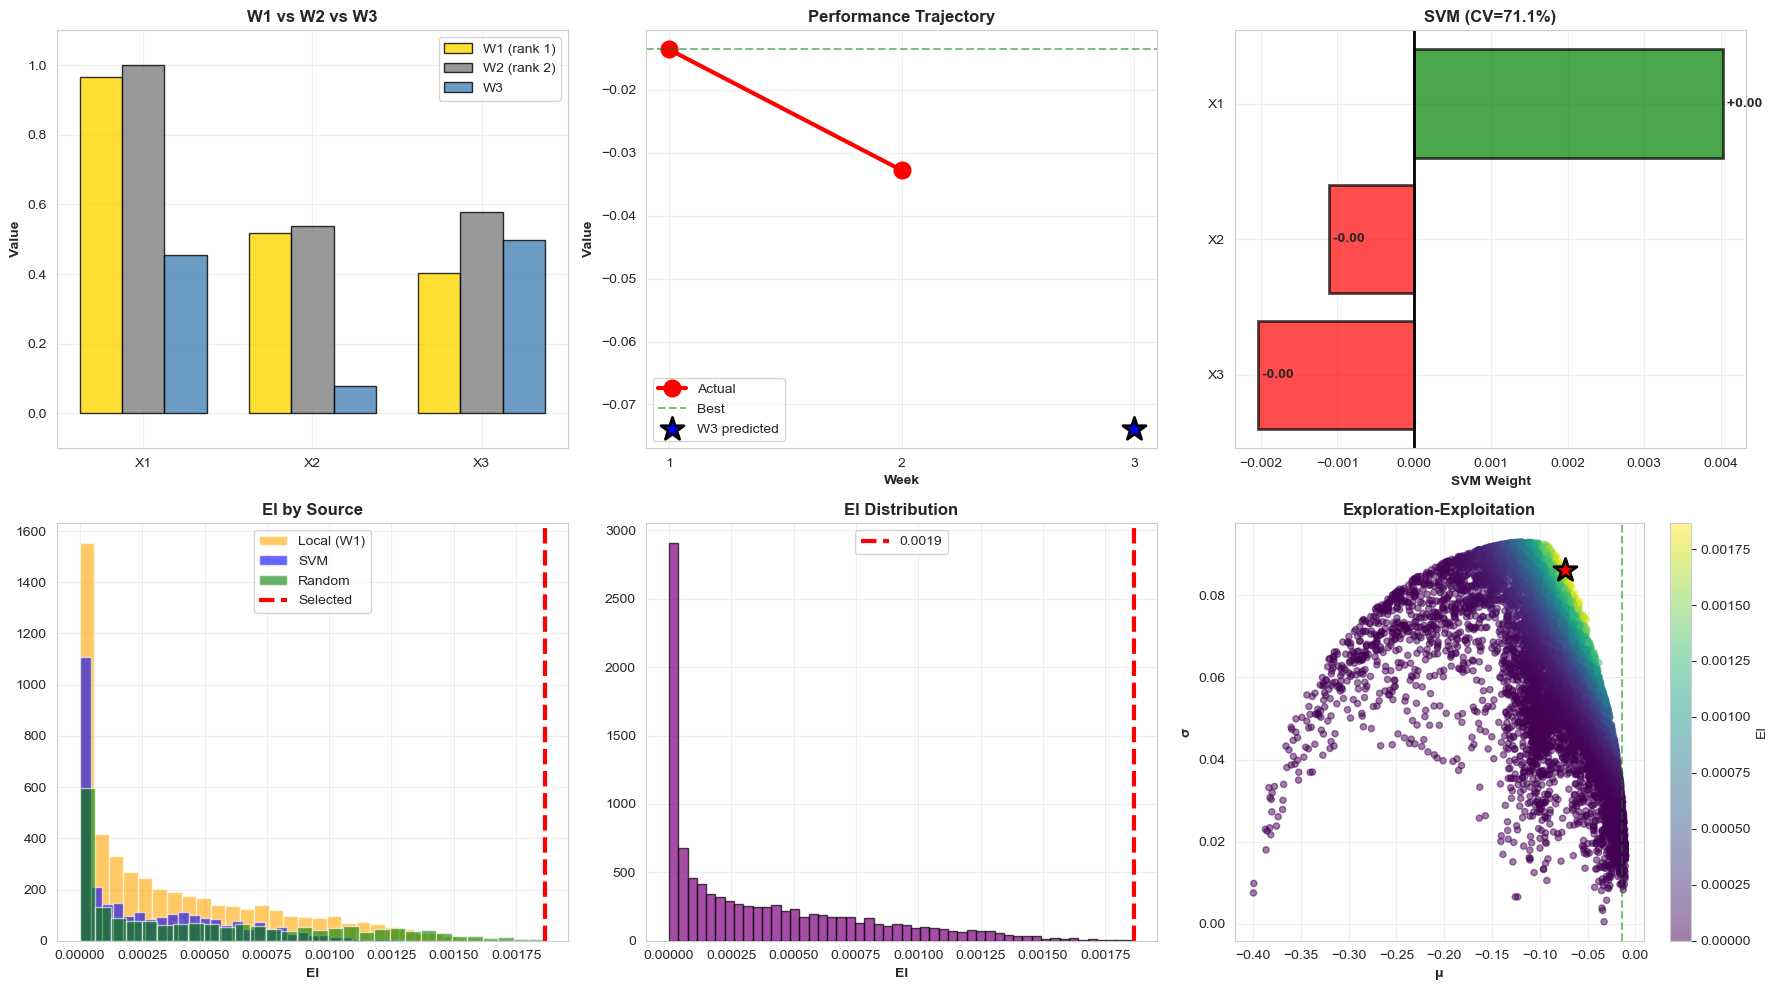

✓ Saved results


In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

dims = np.arange(3)
w = 0.25

# W1 vs W2 vs W3
ax = axes[0, 0]
ax.bar(dims - w, w1_pt, w, label='W1 (rank 1)', alpha=0.8, color='gold', edgecolor='black')
ax.bar(dims, w2_pt, w, label='W2 (rank 2)', alpha=0.8, color='gray', edgecolor='black')
ax.bar(dims + w, x_next, w, label='W3', alpha=0.8, color='steelblue', edgecolor='black')
ax.set_xticks(dims)
ax.set_xticklabels([f'X{i+1}' for i in dims])
ax.set_ylabel('Value', fontweight='bold')
ax.set_title('W1 vs W2 vs W3', fontweight='bold', fontsize=12)
ax.legend()
ax.grid(alpha=0.3)
ax.set_ylim(-0.1, 1.1)

# Performance trajectory
ax = axes[0, 1]
weeks = [1, 2]
values = [w1_val, w2_val]
ax.plot(weeks, values, 'o-', markersize=12, linewidth=3, color='red', label='Actual')
ax.axhline(y_best, color='green', ls='--', alpha=0.5, label='Best')
ax.scatter([3], [mu_next], s=300, marker='*', color='blue',
          edgecolors='black', lw=2, zorder=5, label='W3 predicted')
ax.set_xlabel('Week', fontweight='bold')
ax.set_ylabel('Value', fontweight='bold')
ax.set_title('Performance Trajectory', fontweight='bold', fontsize=12)
ax.set_xticks([1, 2, 3])
ax.legend()
ax.grid(alpha=0.3)

# SVM weights
ax = axes[0, 2]
colors = ['green' if w > 0 else 'red' for w in weights]
ax.barh(dims, weights, color=colors, alpha=0.7, edgecolor='black', lw=2)
for i, w in enumerate(weights):
    ax.text(w, i, f' {w:+.2f}', va='center', fontweight='bold')
ax.axvline(0, color='black', lw=2)
ax.set_yticks(dims)
ax.set_yticklabels([f'X{i+1}' for i in dims])
ax.set_xlabel('SVM Weight', fontweight='bold')
ax.set_title(f'SVM (CV={best_cv:.1%})', fontweight='bold', fontsize=12)
ax.invert_yaxis()
ax.grid(alpha=0.3)

# EI by source
ax = axes[1, 0]
ei_local = ei_values[:len(X_local)]
ei_svm = ei_values[len(X_local):len(X_local)+len(X_svm)]
ei_rand = ei_values[len(X_local)+len(X_svm):]
ax.hist(ei_local, bins=30, alpha=0.6, label='Local (W1)', color='orange')
ax.hist(ei_svm, bins=30, alpha=0.6, label='SVM', color='blue')
ax.hist(ei_rand, bins=30, alpha=0.6, label='Random', color='green')
ax.axvline(ei_next, color='red', ls='--', lw=3, label='Selected')
ax.set_xlabel('EI', fontweight='bold')
ax.set_title('EI by Source', fontweight='bold', fontsize=12)
ax.legend()
ax.grid(alpha=0.3)

# EI distribution
ax = axes[1, 1]
ax.hist(ei_values, bins=50, alpha=0.7, color='purple', edgecolor='black')
ax.axvline(ei_next, color='red', ls='--', lw=3, label=f'{ei_next:.4f}')
ax.set_xlabel('EI', fontweight='bold')
ax.set_title('EI Distribution', fontweight='bold', fontsize=12)
ax.legend()
ax.grid(alpha=0.3)

# Mu vs Sigma
ax = axes[1, 2]
sc = ax.scatter(mu_all, sigma_all, c=ei_values, cmap='viridis', alpha=0.5, s=20)
ax.scatter(mu_next, sigma_next, color='red', s=300, marker='*',
          edgecolors='black', lw=2, zorder=5)
ax.axvline(y_best, color='green', ls='--', alpha=0.5)
ax.set_xlabel('μ', fontweight='bold')
ax.set_ylabel('σ', fontweight='bold')
ax.set_title('Exploration-Exploitation', fontweight='bold', fontsize=12)
plt.colorbar(sc, ax=ax, label='EI')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('Capstone_F3_W3_results.png', dpi=150, bbox_inches='tight')
plt.show()
print('✓ Saved results')

## Format Submission

In [12]:
fmt = '-'.join([f'{v:.6f}' for v in x_next])

print('='*80)
print('F3 WEEK 3 SUBMISSION')
print('='*80)
print(f'\n📋 COPY THIS:\n')
print(fmt)
print('\n' + '='*80)

with open('Capstone_F3_W3_submission.txt', 'w', encoding='utf-8') as f:
    f.write(f'F3 WEEK 3\n{"="*80}\n\n{fmt}\n\n')
    f.write(f'Strategy: Week 1 Focus (Week 2 declined)\n')
    f.write(f'Week 1: {w1_val:.6f} (rank 1)\n')
    f.write(f'Week 2: {w2_val:.6f} (rank 2)\n')
    f.write(f'Prediction: {mu_next:.6f} +/- {sigma_next:.6f}\n')
    f.write(f'Source: {source}\n')

print('✓ Saved submission')
print('\n✓ F3 COMPLETE!')

F3 WEEK 3 SUBMISSION

📋 COPY THIS:

0.455860-0.078088-0.497969

✓ Saved submission

✓ F3 COMPLETE!


In [13]:
print('\n' + '='*80)
print('STRATEGY: WEEK 1 FOCUS WITH BALANCED EXPLORATION')
print('='*80)

print(f'\n📊 Performance History:')
print(f'   Week 1: {w1_val:.6f} (rank {w1_rank}) 🥇')
print(f'   Week 2: {w2_val:.6f} (rank {w2_rank})')
print(f'   Change: {((w2_val/w1_val-1)*100):+.1f}% (WORSE!)')

print(f'\n   Week 1 point: {w1_pt}')
print(f'   Week 2 point: {w2_pt}')
print(f'   Distance W1→W2: {np.linalg.norm(w2_pt - w1_pt):.4f}')

print(f'\n🎯 Week 3 Strategy: W1 FOCUS + EXPLORATION')

print(f'\n   The Challenge:')
print(f'   • Week 1 achieved rank 1 (best point)')
print(f'   • Week 2 moved away and got WORSE')
print(f'   • Question: Is W1 a LOCAL peak or GLOBAL peak?')

print(f'\n   Two Approaches - We are BALANCING both:')

print(f'\n   A) LOCAL EXPLOITATION (refine W1):')
print(f'      • Generate candidates NEAR Week 1 (±0.12 radius)')
print(f'      • Find if slightly better point exists nearby')
print(f'      • Safe: Likely to maintain rank 1')
print(f'      • Risk: Might miss better regions elsewhere')

print(f'\n   B) EXPLORATION (search new areas):')
print(f'      • Week 2 taught us one direction doesn\'t work')
print(f'      • But maybe COMPLETELY different region is better?')
print(f'      • SVM/GP might suggest unexpected areas')
print(f'      • Risk: Might perform worse than W1')
print(f'      • Reward: Could find GLOBAL optimum!')

print(f'\n   Our Balanced Approach:')
print(f'   • 50% LOCAL: Candidates around W1 (safe bet)')
print(f'   • 30% SVM:   SVM-approved regions (learned pattern)')
print(f'   • 20% RANDOM: Pure exploration (wild card)')
print(f'   • xi = 0.08: Moderate exploration bias')

print(f'\n   Expected Outcomes:')

print(f'\n   Scenario 1: W3 comes from LOCAL (near W1)')
print(f'      → W3 point will be close to W1')
print(f'      → Distance from W1: 0.05-0.15')
print(f'      → Strategy: Refining local optimum')
print(f'      → Goal: Small improvement or confirm W1 is local max')

print(f'\n   Scenario 2: W3 comes from SVM/RANDOM (far from W1)')
print(f'      → W3 point will be in DIFFERENT region')
print(f'      → Distance from W1: 0.3-0.7+')
print(f'      → Strategy: Testing GP\'s exploration hypothesis')
print(f'      → Goal: Discover if better region exists')

print(f'\n   Why This Uncertainty is OK:')
print(f'   ✓ GP analyzes ALL candidates and picks highest EI')
print(f'   ✓ If LOCAL wins → W1 region is best (refine it)')
print(f'   ✓ If SVM/RANDOM wins → GP believes elsewhere is better')
print(f'   ✓ We LEARN either way!')

print(f'\n   What Success Looks Like:')

print(f'\n   If W3 is LOCAL (near W1):')
print(f'      ✓ W3 improves → Found better point near W1')
print(f'      ✓ W3 similar → Confirmed W1 is local maximum')
print(f'      ✓ W3 worse → Learned boundary of good region')

print(f'\n   If W3 is EXPLORATION (far from W1):')
print(f'      ✓ W3 improves → JACKPOT! Found better region!')
print(f'      ✓ W3 similar → New region is competitive')
print(f'      ✓ W3 worse → Confirmed W1 region is best, return in W4')

print(f'\n   Week 4 Adaptation Based on W3:')

print(f'\n   If W3 was LOCAL and improved:')
print(f'      → Continue local exploitation around W3')
print(f'      → xi = 0.03 (tight refinement)')

print(f'\n   If W3 was LOCAL and similar/worse:')
print(f'      → Increase exploration (reduce local to 30%)')
print(f'      → xi = 0.10 (favor exploration)')

print(f'\n   If W3 was EXPLORATION and improved:')
print(f'      → Switch focus to W3 region!')
print(f'      → Local exploitation around new best point')

print(f'\n   If W3 was EXPLORATION and worse:')
print(f'      → Return to W1 region')
print(f'      → Tighter local exploitation (70% local, σ=0.08, xi=0.03)')

print(f'\n💡 Key Philosophy:')
print(f'   "Week 1 is our anchor (rank 1), but we stay curious!"')
print(f'   ')
print(f'   This is ADAPTIVE Bayesian Optimization:')
print(f'   • Trust the data (Week 1 is best so far)')
print(f'   • But remain open to discovery (exploration)')
print(f'   • Let GP decide: local refinement OR bold exploration')
print(f'   • Learn from every outcome!')

print(f'\n🎲 What Will Happen?')
print(f'   We don\'t know yet! GP will decide based on:')
print(f'   • Expected Improvement (μ - best - xi)')
print(f'   • Uncertainty bonus (σ * exploration)')
print(f'   • All 17 historical samples')
print(f'   ')
print(f'   After running optimization, check the "Source" output:')
print(f'   • Source: LOCAL → Refining W1')
print(f'   • Source: SVM/RANDOM → Exploring new region')

print('\n' + '='*80)
print('PROCEEDING WITH BALANCED APPROACH...')
print('='*80)


STRATEGY: WEEK 1 FOCUS WITH BALANCED EXPLORATION

📊 Performance History:
   Week 1: -0.013577 (rank 1) 🥇
   Week 2: -0.032767 (rank 2)
   Change: +141.3% (WORSE!)

   Week 1 point: [0.965995 0.517677 0.402788]
   Week 2 point: [1.       0.536593 0.577996]
   Distance W1→W2: 0.1795

🎯 Week 3 Strategy: W1 FOCUS + EXPLORATION

   The Challenge:
   • Week 1 achieved rank 1 (best point)
   • Week 2 moved away and got WORSE
   • Question: Is W1 a LOCAL peak or GLOBAL peak?

   Two Approaches - We are BALANCING both:

   A) LOCAL EXPLOITATION (refine W1):
      • Generate candidates NEAR Week 1 (±0.12 radius)
      • Find if slightly better point exists nearby
      • Safe: Likely to maintain rank 1
      • Risk: Might miss better regions elsewhere

   B) EXPLORATION (search new areas):
      • Week 2 taught us one direction doesn't work
      • But maybe COMPLETELY different region is better?
      • SVM/GP might suggest unexpected areas
      • Risk: Might perform worse than W1
      • Rew